In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [15]:
print('data instances: ', len(df.age.values))
print('max expense = ', max(df.expenses.values))
print('min expense = ', min(df.expenses.values))

data instances:  1338
max expense =  63770.43
min expense =  1121.87


In [16]:
df.loc[df['expenses']>60000]

,age,sex,bmi,children,smoker,region,expenses
543,54,female,47.4,0,yes,southeast,63770.43
1230,52,male,34.5,3,yes,northwest,60021.40
1300,45,male,30.4,0,yes,southeast,62592.87


In [17]:
df = df[df.expenses <= 60000]

df.loc[df['expenses']>60000]

,age,sex,bmi,children,smoker,region,expenses


In [18]:
print('data instances: ', len(df.age.values))
print('max expense = ', max(df.expenses.values))

data instances:  1335
max expense =  58571.07


In [19]:
age = df.age.values
bmi = df.bmi.values
expenses = df.expenses.values

expense_max = max(df.expenses.values)
expense_min = min(df.expenses.values)

# scaled expenses from 0 to 100
df['expenses'] = 100. * (df.expenses - expense_min) / (expense_max - expense_min)
df.head()

/var/folders/8_/f7brq0m95px976h8j2mlqdxr0000gn/T/ipykernel_30286/1871479060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expenses'] = 100. * (df.expenses - expense_min) / (expense_max - expense_min)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,27.438241
1,18,male,33.8,1,no,southeast,1.050807
2,28,male,33.0,3,no,southeast,5.792230
3,33,male,22.7,0,no,northwest,36.314866
4,32,male,28.9,0,no,northwest,4.778117


KMeans centroids
[[48.6379822  30.55860534 16.92319109]
 [26.27731092 27.57563025 31.61390901]
 [42.93714286 34.44057143 66.01858467]
 [24.20980926 30.00817439  3.41699382]]


/var/folders/8_/f7brq0m95px976h8j2mlqdxr0000gn/T/ipykernel_30286/3208684310.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = km.labels_


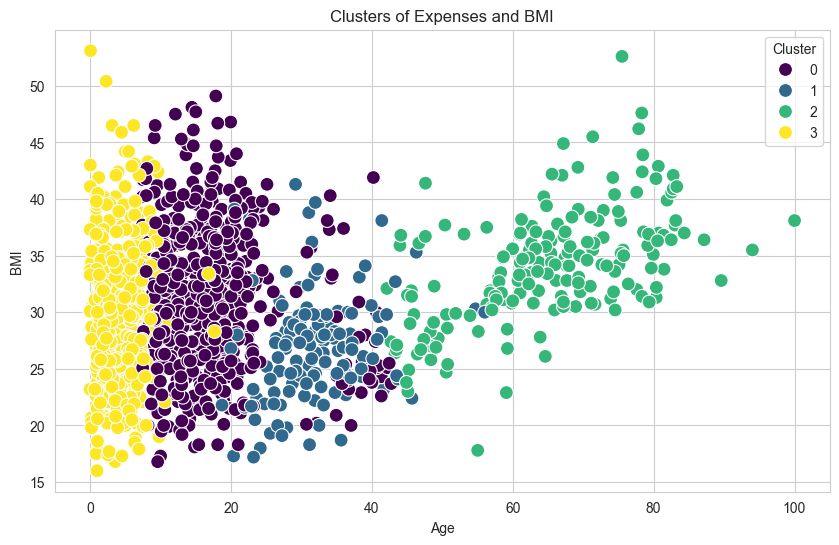

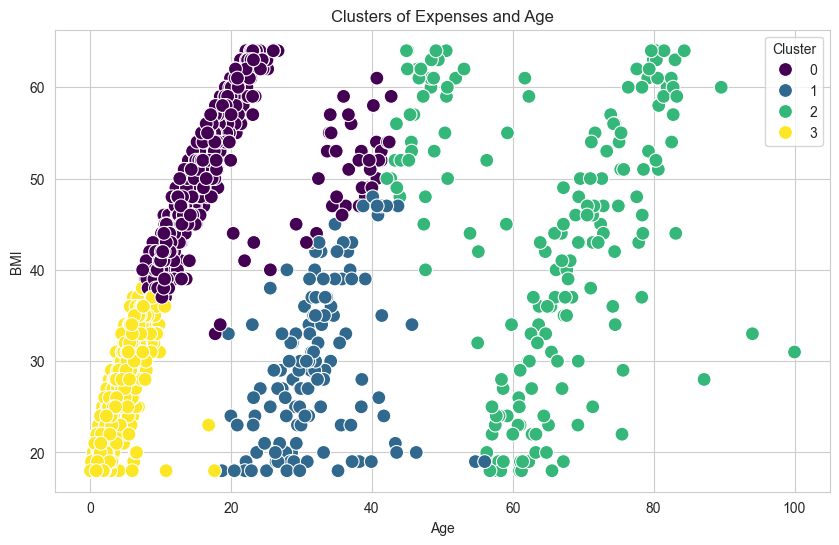

In [20]:
# create 2d array
scaled_expenses = df.expenses.values
data = np.array([df['age'].values, df['bmi'].values, df['expenses'].values]).T  # Transpose to get the correct shape

# create 4 clusters with kmeans
km = KMeans(n_clusters=4, max_iter=1)
km.fit(data)

# add column to dataframe giving cluster labels
df['cluster'] = km.labels_

print("KMeans centroids")
print(km.cluster_centers_)

# set white background grid for seaborn plots
sns.set_style('whitegrid')

# create scatterplot of expenses vs bmi with cluster indicated by hue using seaborn's relplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expenses', y='bmi', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Clusters of Expenses and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.show()

# create scatterplot of expenses vs age with cluster indicated by hue using seaborn's relplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expenses', y='age', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Clusters of Expenses and Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.show()

/var/folders/8_/f7brq0m95px976h8j2mlqdxr0000gn/T/ipykernel_30286/803941116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = km.labels_


KMeans centroids
[[38.74567901 30.30790123 13.97288666]
 [39.47619048 34.66785714 66.97876196]
 [54.87596899 30.50542636 23.80784252]
 [23.32533333 29.3696      4.93463693]]


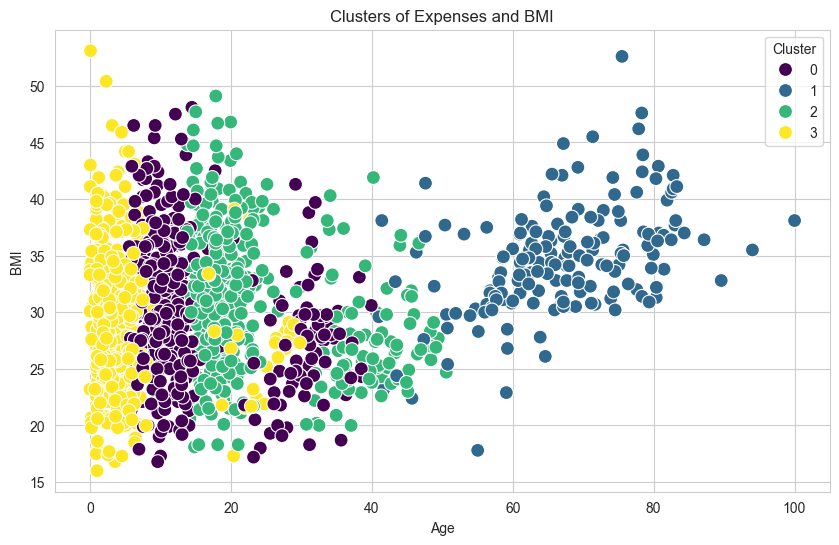

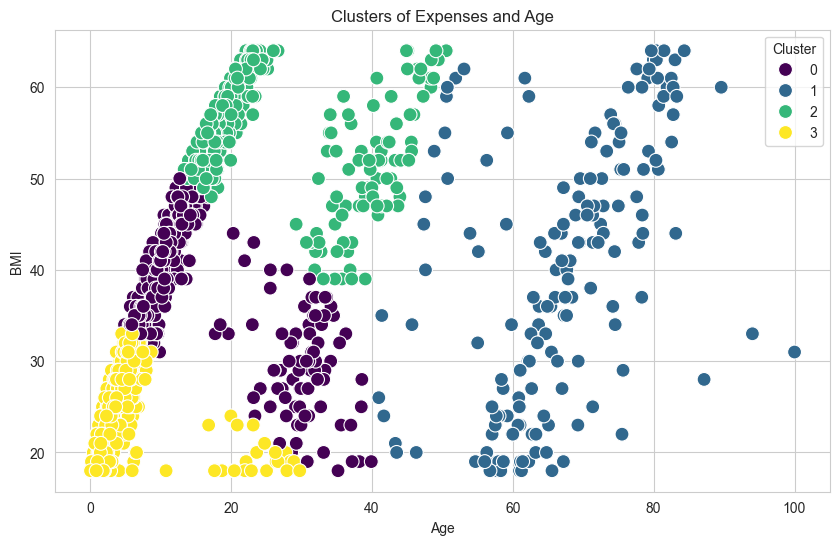

In [21]:
# create 4 clusters with kmeans
km = KMeans(n_clusters=4, max_iter=2)
km.fit(data)

# add column to dataframe giving cluster labels
df['cluster'] = km.labels_

print("KMeans centroids")
print(km.cluster_centers_)

# set white background grid for seaborn plots
sns.set_style('whitegrid')

# create scatterplot of expenses vs bmi with cluster indicated by hue using seaborn's relplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expenses', y='bmi', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Clusters of Expenses and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.show()

# create scatterplot of expenses vs age with cluster indicated by hue using seaborn's relplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expenses', y='age', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Clusters of Expenses and Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.show()

/var/folders/8_/f7brq0m95px976h8j2mlqdxr0000gn/T/ipykernel_30286/3487922346.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = km.labels_


KMeans centroids
[[51.07279693 31.27816092 16.20212909]
 [43.1027027  34.03027027 65.01825415]
 [26.45806452 29.88903226  4.52807919]
 [32.95092025 26.97484663 33.03147109]]


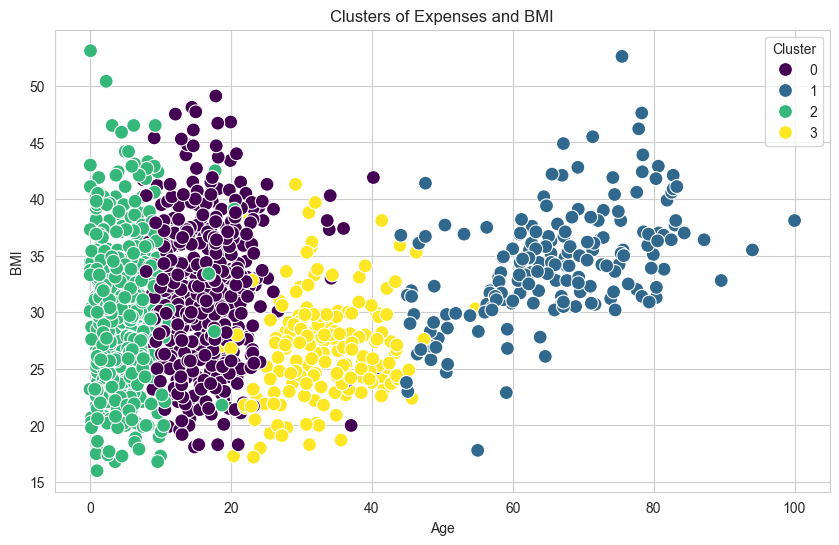

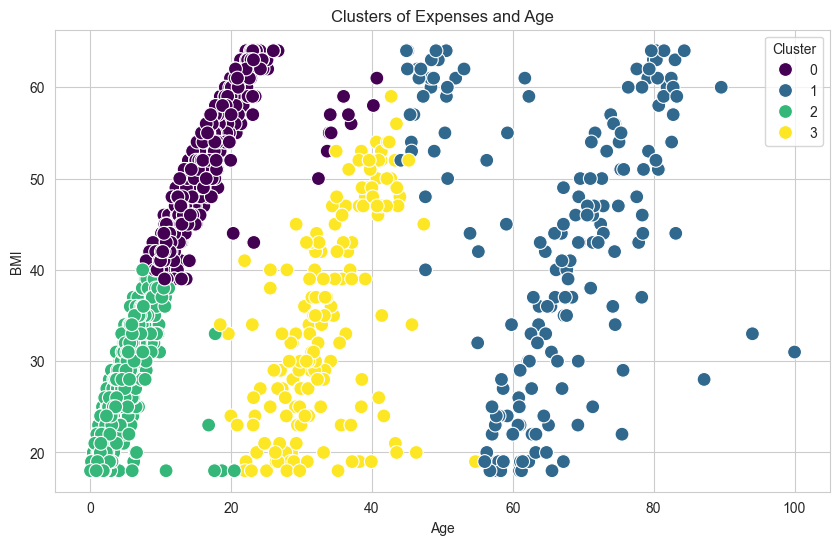

In [22]:
# create 4 clusters with kmeans
km = KMeans(n_clusters=4, max_iter=3)
km.fit(data)

# add column to dataframe giving cluster labels
df['cluster'] = km.labels_

print("KMeans centroids")
print(km.cluster_centers_)

# set white background grid for seaborn plots
sns.set_style('whitegrid')

# create scatterplot of expenses vs bmi with cluster indicated by hue using seaborn's relplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expenses', y='bmi', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Clusters of Expenses and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.show()

# create scatterplot of expenses vs age with cluster indicated by hue using seaborn's relplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expenses', y='age', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Clusters of Expenses and Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.show()